Nama : Bonifasius Ekky

Kelas : 3E

Absen : 08

# Praktikum 1

Klasifikasi SVM dengan Data Dummy

In [ ]:
# import library
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

Penjelasan : kode ini dibuat untuk mengimport beberapa library yang dibutuhkan dalam metode SVM

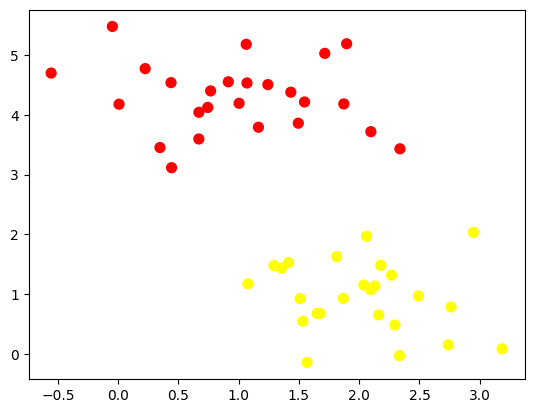

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

Model yang digunakan adalah sebuah model yang sederhana berupa generative model untuk menentukan label pada poin baru. Kode ini menghasilkan data sintetis dengan dua klaster menggunakan make_blobs dan memvisualisasikannya dengan grafik sebaran.
* make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) Membuat dataset dengan 50 sampel yang dibagi menjadi dua pusat (kelas), dengan deviasi standar 0.60 untuk sebaran data.
* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') Menampilkan scatter plot data, dengan warna titik-titik yang ditentukan oleh label y, ukuran titik 50, dan colormap 'autumn' untuk membedakan kelas-kelas.

(-1.0, 3.5)

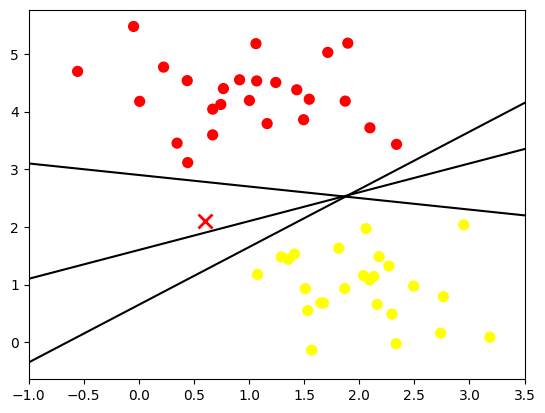

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

Penjelasan :
Kode ini memvisualisasikan data dan beberapa garis pada plot

* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Menampilkan scatter plot data dengan warna berdasarkan label y.
* plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10): Menandai titik spesifik (0.6, 2.1) dengan simbol 'x' merah yang besar pada plot.
* for m, b in [...]: Menggambar beberapa garis dengan kemiringan m dan intercept b pada plot.
* plt.xlim(-1, 3.5): Mengatur batas sumbu x plot.


In [ ]:
(-1.0, 3.5)

(-1.0, 3.5)

Kode ini memvisualisasikan data klaster dengan beberapa garis pemisah di atasnya. Pertama, titik-titik data divisualisasikan menggunakan scatter plot, di mana setiap titik diberi warna berdasarkan klasternya. Sebuah tanda 'x' merah ditambahkan di posisi (0.6, 2.1) untuk menyoroti titik tertentu. Kemudian, tiga garis lurus dengan berbagai kemiringan dan *intercept* digambar untuk menunjukkan kemungkinan batas pemisah antara klaster. Batas sumbu x juga ditentukan agar plot terlihat dalam rentang tertentu, yaitu dari -1 hingga 3.5.


(-1.0, 3.5)

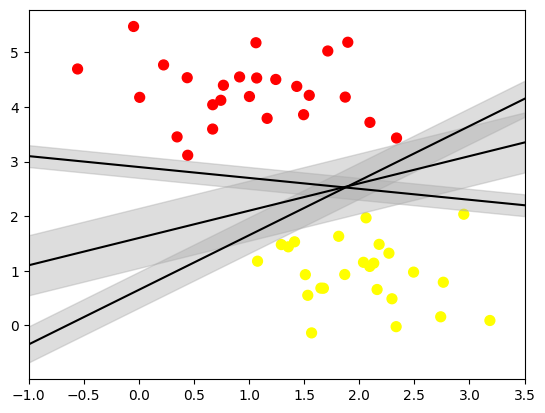

In [ ]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

In [ ]:
(-1.0, 3.5)

(-1.0, 3.5)

Penjelasan :     
Kode ini memvisualisasikan data dan beberapa garis pada plot

* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn'): Menampilkan scatter plot data dengan warna berdasarkan label y.
* for m, b, d in [...]: Untuk setiap pasangan kemiringan m, intercept b, dan deviasi d, menggambar garis dengan kemiringan m dan intercept b, serta area yang dipenuhi antara garis yfit - d dan yfit + d dengan warna abu-abu transparan.
* plt.xlim(-1, 3.5): Mengatur batas sumbu x plot.

### **Penerapan fitting SVM **

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

Kode ini menggunakan *Support Vector Classifier* (SVC) dari pustaka sklearn untuk membuat model klasifikasi dengan kernel linear. Model dibangun dengan parameter C=1E10, yang memberi penalti besar untuk kesalahan klasifikasi, sehingga memaksa model untuk memisahkan data dengan margin yang sangat ketat. Model tersebut dilatih menggunakan data X dan label y melalui metode fit, yang berarti model mencoba menemukan garis pemisah terbaik antara dua klaster dalam data tersebut.

In [ ]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):

    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Kode ini menggambar garis keputusan dan margin dari model SVM pada plot:

* xlim dan ylim: Mendapatkan batas sumbu x dan y dari plot.
* np.linspace dan np.meshgrid: Membuat grid koordinat untuk evaluasi model SVM.
* model.decision_function: Menghitung nilai fungsi keputusan pada grid dan mengubahnya ke bentuk matriks.
* ax.contour: Menggambar garis keputusan dan margin (level -1, 0, 1) pada plot.
* ax.scatter: Jika plot_support=True, menampilkan support vectors dengan ukuran besar dan hanya garis tepinya.
* ax.set_xlim dan ax.set_ylim: Mengatur kembali batas sumbu untuk menjaga konsistensi plot.

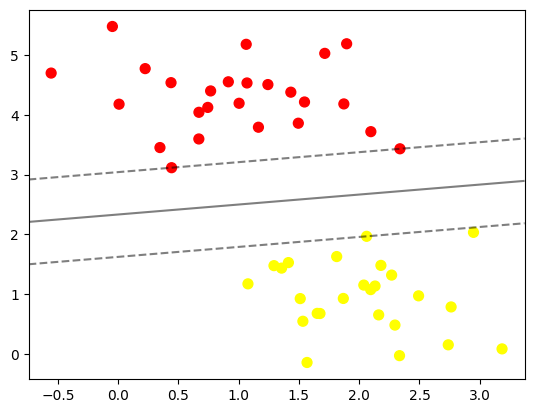

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

beberapa titik data yang menyentuh (masuk ke area) garis disebut sebagai support vector.

Penjelasan :     
Kode ini memvisualisasikan data dan garis keputusan model SVM

* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') Menampilkan data dalam scatter plot, dengan warna berdasarkan label y.
* plot_svc_decision_function(model) Menggambar garis keputusan SVM beserta margin pemisah di atas data.


In [ ]:
#untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

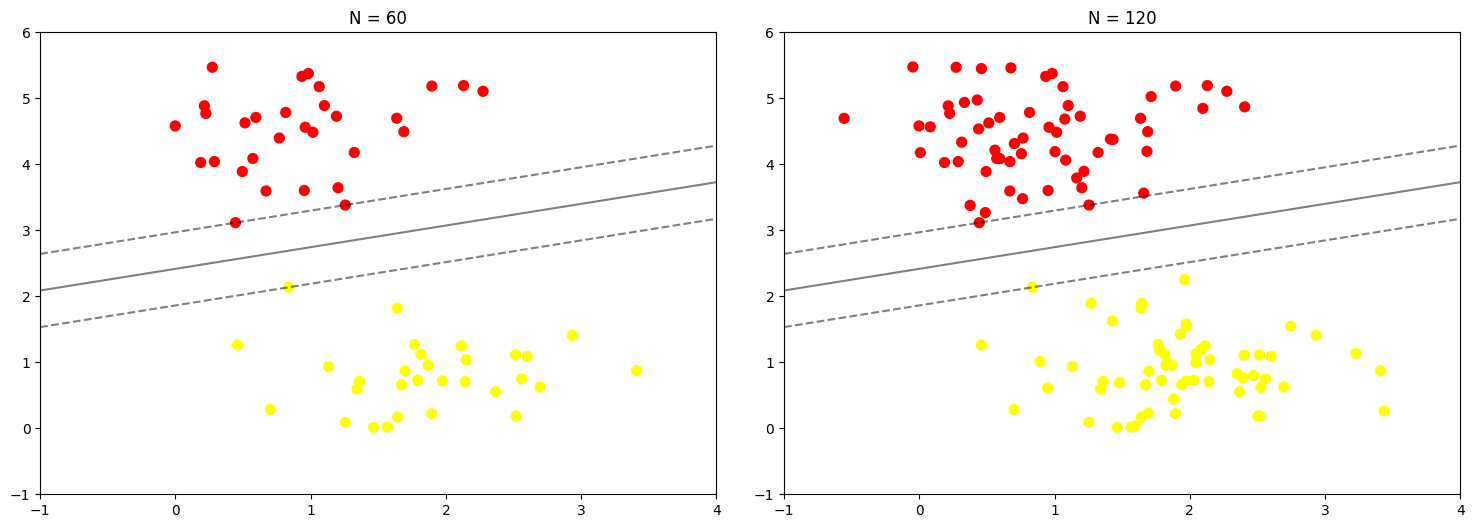

In [ ]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)

    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

Penjelasan :     
Kode ini membuat visualisasi model Support Vector Machine (SVM) menggunakan dataset sintetis yang dihasilkan oleh make_blobs dengan dua kelas. Fungsi plot_svm melatih model SVM dengan kernel linear pada sejumlah sampel (N) yang bervariasi, lalu menampilkan scatter plot dari data tersebut bersama garis keputusan model SVM. Fungsi plot_svc_decision_function digunakan untuk menggambar batas keputusan model.

Kode selanjutnya membuat dua subplot secara berdampingan dengan plt.subplots(1, 2) dan menyesuaikan tata letaknya. Pada setiap subplot, SVM dilatih dengan jumlah sampel yang berbeda (N=60 dan N=120), sehingga pengguna dapat membandingkan bagaimana model SVM berperilaku dengan jumlah data yang berbeda. Setiap subplot diberi judul yang menunjukkan jumlah sampel (N).

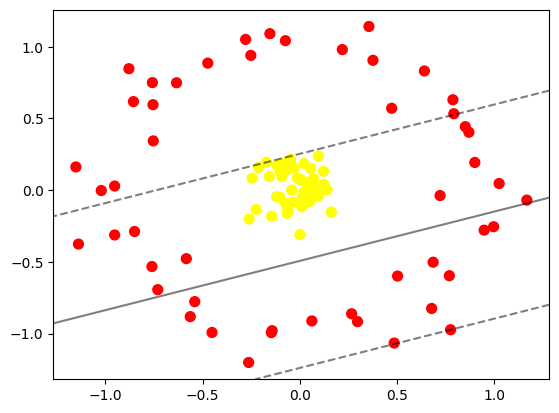

In [ ]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

Penjelasan :    

Kode ini membuat dan memvisualisasikan hasil klasifikasi SVM (Support Vector Machine) pada dataset berbentuk lingkaran yang dihasilkan secara sintetik menggunakan make_circles.

Pertama, dataset dibuat dengan make_circles(100, factor=.1, noise=.1), yang menghasilkan 100 sampel data dalam dua kelas berbentuk lingkaran konsentris. Parameter factor=.1 mengontrol jarak antara lingkaran dalam dan luar, dan noise=.1 menambahkan sedikit variabilitas acak pada data.

Selanjutnya, model SVM dengan kernel linear dilatih pada data tersebut menggunakan SVC(kernel='linear').fit(X, y). SVM ini mencoba memisahkan dua kelas data, meskipun lingkaran tidak dapat dipisahkan secara linier.

Kemudian, scatter plot menampilkan titik-titik data, dengan warna ditentukan oleh label y (dua kelas), ukuran titik s=50, dan colormap autumn yang memberikan gradasi warna dari merah ke kuning.

Fungsi plot_svc_decision_function(clf, plot_support=False) digunakan untuk menggambar garis keputusan dari model SVM pada scatter plot, tanpa menampilkan support vectors (karena plot_support=False). Hasilnya adalah visualisasi data, garis keputusan yang dihasilkan oleh SVM linear, dan batas pemisah antar kelas yang ditentukan oleh model.

In [ ]:
r = np.exp(-(X ** 2).sum(1))

Penjelasan :    
Kode ini digunakan untuk menghitung nilai dari variabel r, yang kemungkinan besar akan digunakan sebagai koordinat z dalam plot 3D.

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 7.37416298e-02,  2.15211147e-02],
       [ 7.76842552e-01, -9.73372703e-01],
       [-4.72949609e-01,  8.85604806e-01],
       [ 2.19585675e-01,  9.80084138e-01],
       [ 1.08373187e-02, -1.16409360e-01],
       [ 4.73553179e-01,  5.70835299e-01],
       [-2.44249874e-01,  8.36196440e-02],
       [ 4.98708257e-02, -5.23674157e-02],
       [ 2.27569677e-02,  1.85033594e-01],
       [ 1.16903710e+00, -6.94472515e-02],
       [-5.63099906e-01, -8.82084899e-01],
       [-9.52289199e-01, -3.12603695e-01],
       [ 9.98319811e-01, -2.55139895e-01],
       [-1.00746171e-01,  1.32738604e-01],
       [ 4.54404755e-02, -8.11627529e-02],
       [-1.02122458e+00, -2.69782296e-03],
       [-2.60222858e-01, -2.01644299e-01],
       [-1.15179695e+00,  1.61648413e-01],
       [ 8.71039508e-01,  4.03765884e-01],
       [ 4.86434296e-01, -1.06626507e+00],
       [ 6.79388619e-01, -8.25207943e-01],
       [ 6.86933908e-01, -5.02601049e-01],
       [-9.52478485e-01,  2.85240940e-02],
       [-1.19252539e-01, -4.61924030e-02],
       [-8.78832602e-01,  8.46746035e-01],
       [ 2.97811066e-01, -9.16954915e-01],
       [ 7.12883843e-02,  7.98031761e-02],
       [-1.53342312e-01,  1.09099507e+00],
       [ 3.69197710e-02,  5.21849042e-02],
       [ 3.77242002e-01,  9.05351963e-01],
       [ 7.88712520e-01,  6.30203960e-01],
       [-7.55049354e-01,  5.95685763e-01],
       [ 5.59440059e-02, -1.32844740e-02],
       [-8.49967795e-01, -2.88529071e-01],
       [ 1.62917607e-01, -1.52864029e-01],
       [-4.68459721e-02,  2.15290649e-01],
       [ 6.82139773e-02, -1.84969129e-03],
       [-6.39384900e-02, -1.62431046e-01],
       [-7.58011553e-01,  7.49952124e-01],
       [ 5.68083019e-02,  1.52067885e-01],
       [-4.10680840e-02,  7.88134863e-04],
       [ 1.24232085e-01,  3.90384651e-02],
       [-2.62670887e-01, -1.20180386e+00],
       [ 1.18673307e-02, -5.74157172e-02],
       [ 8.52464766e-01,  4.42599314e-01],
       [ 9.49387927e-01, -2.79129648e-01],
       [ 7.93451511e-01,  5.32635087e-01],
       [-1.02406907e-01, -4.91610119e-02],
       [-7.60282874e-01, -5.32906515e-01],
       [-8.55569565e-01,  6.17325341e-01],
       [-7.17433737e-02,  1.90488433e-01],
       [-7.08309363e-02, -9.41069880e-02],
       [ 3.56575986e-01,  1.14125468e+00],
       [-5.83374600e-01, -4.77847068e-01],
       [-1.12467075e-02,  8.47156163e-02],
       [ 1.35321812e-03, -3.10188336e-01],
       [-7.34024869e-02,  1.04217348e+00],
       [ 2.67339435e-01, -8.62080134e-01],
       [-1.56124942e-01,  9.49233309e-02],
       [ 1.40940584e-01,  1.57498564e-03],
       [ 9.01491138e-01,  1.92797978e-01],
       [ 8.26851306e-03,  6.85621062e-02],
       [ 1.22258498e-01,  1.31630738e-01],
       [-7.14288614e-02,  1.35353756e-01],
       [ 6.41994803e-01,  8.31065853e-01],
       [ 5.03900701e-01, -5.99154803e-01],
       [-2.92787709e-02,  1.54745289e-01],
       [-5.39994319e-01, -7.77487964e-01],
       [-9.07114232e-02,  9.46756888e-02],
       [-1.41778585e-01, -9.80166286e-01],
       [-2.51420272e-01,  9.39728929e-01],
       [ 8.63415733e-02, -3.38979782e-02],
       [-1.45828372e-01, -9.93449805e-01],
       [-7.11266755e-02, -9.62048072e-02],
       [-1.13861595e+00, -3.76194333e-01],
       [-1.97753667e-03,  7.85877908e-02],
       [-3.71189017e-02, -8.42745865e-02],
       [-7.30404868e-01, -6.94029166e-01],
       [-9.63891424e-02,  1.79647105e-01],
       [ 9.70728535e-02, -4.07079696e-02],
       [-7.53648446e-01,  3.43338831e-01],
       [ 7.70345681e-01, -5.96754710e-01],
       [ 6.27120212e-02, -9.12124944e-01],
       [-6.33862007e-01,  7.48628671e-01],
       [ 5.86592900e-02, -2.34695800e-02],
       [ 9.47947609e-02, -1.77714638e-02],
       [ 5.59507516e-02, -6.84184443e-02],
       [-1.44110710e-01, -1.81448827e-01],
       [-4.51238884e-01, -9.92546891e-01],
       [-2.78296057e-01,  1.05084286e+00],
       [-2.12540475e-01,  1.57098773e-01],
       [-6.13775071e-02, -1.41043093e-01

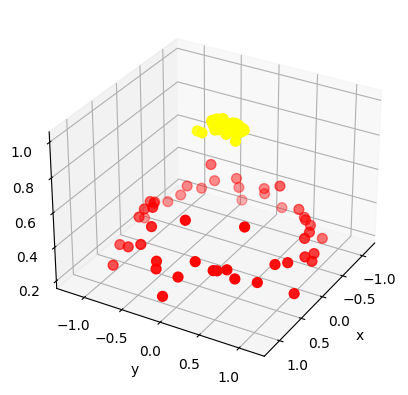

In [ ]:
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

Penjelasan :    
Kode ini membuat visualisasi 3D dari dataset dengan menggunakan matplotlib, di mana pengguna dapat mengubah sudut pandang plot secara interaktif. Fungsi plot_3D membuat plot 3D menggunakan scatter3D, di mana titik-titik data dari array X diplot pada sumbu x dan y, sementara variabel r (yang mungkin didefinisikan di luar fungsi) diplot pada sumbu z. Parameter elev dan azim mengontrol sudut elevasi dan azimuthal untuk mengatur sudut pandang plot 3D. Fungsi interact dari ipywidgets memungkinkan pengguna untuk mengubah parameter elev dan azim secara interaktif, sehingga mereka dapat memutar plot dan melihat data dari berbagai sudut.

In [ ]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

Penjelasan :    
Kode ini melatih model Support Vector Machine (SVM) dengan kernel Radial Basis Function (RBF) untuk melakukan klasifikasi pada dataset X dan label y

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

Penjelasan :    

Kode ini memvisualisasikan hasil klasifikasi SVM dengan kernel RBF. Scatter plot pertama menampilkan data dengan warna berdasarkan labelnya. Fungsi plot_svc_decision_function(clf) menggambar garis keputusan dan margin dari model. Titik-titik support vectors digambar dengan ukuran besar dan hanya garis tepinya terlihat, menunjukkan titik-titik yang menentukan hyperplane pemisah.

* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') Menampilkan scatter plot dari data X, di mana warna titik-titik data ditentukan oleh label y. Titik-titik ini digambar dengan ukuran 50 dan colormap 'autumn' untuk menunjukkan kelas-kelas yang berbeda.

* plot_svc_decision_function(clf) Menggambar garis keputusan yang dihasilkan oleh model SVM yang dilatih (clf). Fungsi ini menampilkan batas keputusan yang memisahkan dua kelas, margin di sekitar batas tersebut, dan membantu visualisasi bagaimana model membagi ruang fitur.

* plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=300, lw=1, facecolors='none') Menampilkan support vectors sebagai titik-titik besar (ukuran 300) dengan hanya garis tepi yang terlihat (tanpa warna latar belakang). Support vectors adalah titik-titik data yang berada di sekitar margin dan berperan penting dalam menentukan posisi hyperplane pemisah.


**Data Overlap**

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

Penjelasan :    
Kode ini menghasilkan dan memvisualisasikan dataset sintetis dengan dua kelas menggunakan make_blobs

* make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) Membuat dataset dengan 100 sampel yang dibagi menjadi dua pusat (kelas), dengan penyebaran data yang disebabkan oleh deviasi standar 1.2, yang menentukan seberapa tersebar data di sekitar pusatnya. Parameter random_state=0 memastikan hasil yang konsisten setiap kali kode dijalankan.

* plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') Menampilkan scatter plot dari data, di mana sumbu x dan y mewakili fitur dari data, warna titik menunjukkan kelasnya (c=y), ukuran titik adalah 50, dan colormap 'autumn' digunakan untuk membedakan kelas-kelas yang berbeda.

In [ ]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)

Penjelasan :     

Kode ini membandingkan efek dari parameter C pada model SVM dengan kernel linier menggunakan dua subplot.

* make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8) Membuat dataset dengan 100 sampel dan dua pusat kelas, dengan deviasi standar 0.8.

* fig, ax = plt.subplots(1, 2, figsize=(16, 6)) Membuat dua subplot berdampingan untuk perbandingan visual.

* for axi, C in zip(ax, [10.0, 0.1]) Melatih model SVM dengan dua nilai C yang berbeda (10.0 dan 0.1). C mengontrol penalti untuk kesalahan klasifikasi, dengan nilai tinggi (10.0) mengurangi kesalahan training dan nilai rendah (0.1) lebih toleran terhadap kesalahan.

* xi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') Menampilkan scatter plot dari data dengan warna berdasarkan label kelas.

* plot_svc_decision_function(model, axi): Menggambar garis keputusan dan margin dari model SVM pada subplot.

* axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none') Menampilkan support vectors pada subplot dengan titik besar dan hanya garis tepinya terlihat.

* axi.set_title('C = {0:.1f}'.format(C), size=14)Menambahkan judul pada setiap subplot yang menunjukkan nilai C yang digunakan.

# Praktikum 2

**Klasifikasi SVM Pada Data Citra**

dataset yang digunakan adalah Labeled Faces in the Wild dataset (sebuah dataset yang berisi ribuan wajah publik figur).

In [ ]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(len(faces.target_names))
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)


Penjelasan:   

* fetch_lfw_people(min_faces_per_person=60) memuat dataset LFW yang terdiri dari gambar wajah orang-orang terkenal.

* min_faces_per_person=60 memastikan hanya orang-orang dengan setidaknya 60 gambar yang dimasukkan dalam dataset.

* faces.target_names menampilkan daftar nama orang-orang dalam dataset.

* len(faces.target_names)menampilkan jumlah orang unik yang ada dalam dataset.

* faces.images.shape menampilkan dimensi dataset gambar, dengan format (jumlah gambar, tinggi gambar, lebar gambar)


In [ ]:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
8
(1348, 62, 47)

(1348, 62, 47)

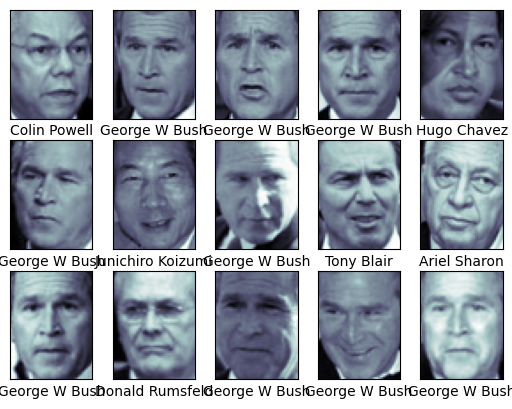

In [ ]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

Penjelasan:

* fig, ax = plt.subplots(3, 5) membuat figure dengan 3 baris dan 5 kolom subplot untuk menampilkan gambar.

* for i, axi in enumerate(ax.flat) loop melalui semua subplot (ax.flat meratakan array subplot).

* axi.imshow(faces.images[i], cmap='bone')menampilkan gambar wajah ke subplot menggunakan skala warna bone.

* axi.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]]) menghilangkan label sumbu x dan y, serta menambahkan nama orang sebagai label x untuk setiap gambar.

In [ ]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

pca = RandomizedPCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

Penjelasan:

* RandomizedPCA(n_components=150, whiten=True, random_state=42) menggunakan Principal Component Analysis (PCA) untuk mereduksi dimensi data menjadi 150 komponen utama. Opsi whiten=True membuat data terstandarisasi, dan random_state=42 menjamin hasil yang konsisten.

* SVC(kernel='rbf', class_weight='balanced')membuat model Support Vector Classifier (SVC) dengan radial basis function (RBF) sebagai kernel. class_weight='balanced' menyesuaikan bobot kelas sesuai dengan frekuensi kemunculannya untuk menangani ketidakseimbangan data.

* make_pipeline(pca, svc) menggabungkan PCA dan SVC ke dalam sebuah pipeline, di mana PCA digunakan untuk mereduksi dimensi data sebelum dikirim ke model SVM untuk klasifikasi.

In [ ]:
# pemisahan data training dan data testing

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target,
                                                random_state=42)

Penjelasan:

Kode ini membagi data wajah menjadi set pelatihan dan pengujian

* train_test_split(faces.data, faces.target, random_state=42) membagi data gambar wajah (faces.data) dan labelnya (faces.target) menjadi data pelatihan dan pengujian.

* random_state=42 digunakan agar hasil pembagian data konsisten setiap kali kode dijalankan.

* Xtrain: Fitur data untuk pelatihan.
* Xtest: Fitur data untuk pengujian.
* ytrain: Label target untuk pelatihan.
* ytest: Label target untuk pengujian.

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)
print(grid.best_score_)

Penjelasan:

* param_grid untuk mendefinisikan rentang nilai untuk parameter SVM yang akan diuji

* svc__C nilai regularization parameter (C) untuk SVM.
* svc__gamma untuk RBF kernel.
* GridSearchCV(model, param_grid)membuat objek GridSearchCV untuk melakukan pencarian parameter terbaik dari kombinasi yang ada di param_grid untuk model pipeline (PCA + SVC).

* %time grid.fit(Xtrain, ytrain) melatih model dengan data pelatihan menggunakan semua kombinasi parameter yang didefinisikan, dan mengukur waktu eksekusi.

* grid.best_params_ menampilkan kombinasi parameter terbaik yang ditemukan oleh GridSearch.

* grid.best_score_ menampilkan skor terbaik yang dicapai model dengan parameter optimal tersebut.

Tujuan kode ini adalah mencari kombinasi parameter SVM terbaik untuk meningkatkan performa model.

**prediksi label untuk data testing**

In [ ]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

Penjelasan:

model = grid.best_estimator_ mengambil model terbaik yang ditemukan oleh GridSearchCV dengan parameter optimal (best_estimator_).

yfit = model.predict(Xtest) menggunakan model terbaik tersebut untuk memprediksi label (yfit) pada data uji (Xtest).

In [ ]:
# hasil label pada data testing

fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
                   color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14)

Penjelasan:

Kode ini bertujuan untuk menampilkan prediksi hasil klasifikasi gambar wajah pada data uji, sekaligus menyoroti kesalahan prediksi. Pertama, grid berukuran 4x6 dibuat menggunakan plt.subplots(4, 6), sehingga 24 gambar wajah dapat ditampilkan sekaligus. Dalam loop for, setiap gambar wajah dari data uji (Xtest) ditampilkan menggunakan imshow setelah diubah kembali ke dimensi 62x47 piksel, dengan skema warna bone. Label pada sumbu x dan y dihilangkan agar tampilan lebih bersih. Kemudian, pada setiap subplot, nama orang yang diprediksi ditampilkan sebagai label pada sumbu y. Jika prediksi sesuai dengan label sebenarnya (yfit[i] == ytest[i]), nama tersebut ditampilkan dalam warna hitam, tetapi jika prediksi salah, nama ditampilkan dalam warna merah untuk memudahkan identifikasi kesalahan. Terakhir, judul utama ditambahkan dengan suptitle, memberikan konteks bahwa kesalahan prediksi ditandai dengan warna merah.

contoh di atas hanya menunjukkan satu data dengan label salah. Secara pengukuran, performa klasifikasi dapat diketahui sebagai berikut

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest, yfit,
                            target_names=faces.target_names))

Penjelasan:

Kode ini menghasilkan laporan evaluasi model klasifikasi menggunakan metrik seperti precision, recall, f1-score, dan support. fungsi classification_report dari sklearn.metrics digunakan untuk membandingkan label asli data uji (ytest) dengan hasil prediksi model (yfit). Argumen target_names=faces.target_names memberikan nama-nama kelas atau label yang digunakan dalam dataset wajah

In [ ]:
# bentuk confusion matrix

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(ytest, yfit)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')

Penjelasan:

Kode ini membuat dan menampilkan matriks kebingungan (confusion matrix) untuk evaluasi model klasifikasi. Pertama, confusion_matrix dari sklearn.metrics digunakan untuk menghitung matriks kebingungan dengan membandingkan label asli data uji (ytest) dan hasil prediksi (yfit). Hasilnya disimpan dalam variabel mat. Kemudian, fungsi sns.heatmap dari Seaborn digunakan untuk memvisualisasikan matriks tersebut dalam bentuk heatmap, di mana setiap sel menunjukkan jumlah prediksi yang benar dan salah untuk masing-masing kelas. Parameter annot=True menambahkan angka ke dalam sel, dan fmt='d' memastikan angka ditampilkan sebagai bilangan bulat. Label pada sumbu x dan y menunjukkan nama kelas (nama orang terkenal) dari dataset. Akhirnya, sumbu x dilabeli sebagai "true label" dan sumbu y sebagai "predicted label," memberikan konteks yang jelas untuk interpretasi hasil. Visualisasi ini membantu dalam memahami di mana model melakukan kesalahan dan mana kelas yang sering tertukar.

# Praktikum 3

**Klasifikasi Naive Bayes dengan Data Dummy**

Pada percobaan ini kita akan menggunakan data dummy (sintentis) untuk membuat sebuah model Naive Bayes. Untuk membuat data dummy, kita dapat menggunakan fungsi make_classification dari library scikit-learn. Selanjutnya, kita akan membuat model Multinomial Naive Bayes dengan menggunakan MultinomialNB dan model Gaussian Naive Bayes menggunakan GaussianNB.

**Mendefinisikan Data Dummy**

In [ ]:
import numpy as np
from sklearn.datasets import make_classification

# Membuat data dummy
# Hasil dari make_classification berupa data fitur X dan label y
# Label y akan berupa data yang sudah di encode (angka)
X,y = make_classification(n_samples=30, n_features=2, n_classes=2, n_informative=2, n_redundant=0, n_repeated=0, shuffle=False)

# Secara defalt, make_classfication menghasilkan nilai float
# Kita perlu merubah dalam bentuk diskrit

# Absolutekan nilai
X = np.absolute(X)

# Bulatkan nilai ke 2 angka dibelakang koma
# Kalikan dengan 100 supaya tidak ada lagi koma
X = np.round(X, 2) * 100

# Ubah ke dalam bentuk integer
X = X.astype(int)
print(X)
print(y)

[[114 139]
 [ 40  78]
 [128 127]
 [141 112]
 [  6  12]
 [108  44]
 [ 86  31]
 [ 67 132]
 [ 75  71]
 [ 92  96]
 [ 27  22]
 [ 76  76]
 [ 69  67]
 [133 135]
 [170 174]
 [194 197]
 [ 86  76]
 [175 204]
 [119 124]
 [ 43  17]
 [ 98  98]
 [215 265]
 [ 92  88]
 [106  82]
 [263 162]
 [ 43 134]
 [144 112]
 [108  28]
 [ 66  53]
 [137   7]]
[0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1]


Penjelasan:

Parameter yang digunakan pada fungsi make_classification adalah,

n_samples: jumlah sampel yang diinginkan

n_features: jumlah fitur yang digunakan

n_classes: jumlah kelas

n_informative: jumlah fitur yang memiliki korelasi dengan kelas

n_redundant: jumlah fitur yang tidak memiliki korelasi dengan kelas

n_repeated: jumlah fitur yang diulang


Kode ini digunakan untuk menghasilkan dan memproses dataset dummy untuk eksperimen dengan model klasifikasi. Dengan menggunakan fungsi make_classification dari scikit-learn, kode menciptakan dataset berisi 30 sampel dengan 2 fitur informatif dan 2 kelas. Fitur yang dihasilkan awalnya dalam format float, sehingga kode melakukan beberapa transformasi untuk mengubahnya menjadi nilai diskrit. Pertama, nilai absolut dari fitur diambil untuk menghindari angka negatif. Kemudian, nilai dibulatkan hingga dua angka desimal dan dikalikan dengan 100 untuk menghilangkan desimal, sebelum akhirnya dikonversi menjadi tipe data integer. Hasil akhirnya adalah data fitur yang lebih mudah digunakan dan dipahami, yang dicetak bersamaan dengan label target, siap untuk digunakan dalam pengujian model klasifikasi.

**Membuat Data Frame**

Agar data lebih mudah untuk dibaca, maka kita akan membuat DataFrame dengan menggunakan library Pandas berdasarkan data dummy yang telah dibuat sebelumnya

In [ ]:
import pandas as pd

# Reshape label y menjadi 2D
# Hal ini dilakukan karena kita akan menggabungkannya dengan data fitur X
y_new = y.reshape(len(y), 1)

# Gabungkan fitur X dan label y dalam data array
data = np.concatenate((X, y_new), axis=1)

# Definisikan nama kolom
nama_kolom = ['Fitur 1', 'Fitur 2', 'Label']

# Buat Data Frame
df = pd.DataFrame(data, columns=nama_kolom)

# Cek Data Frame
df.head()

,Fitur 1,Fitur 2,Label
0,114,139,0
1,40,78,0
2,128,127,0
3,141,112,0
4,6,12,0


Penjelasan:

Kode ini mengubah label target menjadi format yang sesuai untuk digabungkan dengan data fitur, kemudian membuat DataFrame menggunakan pandas. Pertama, label y diubah menjadi bentuk 2D dengan reshape agar dapat digabungkan dengan fitur X. Selanjutnya, fitur dan label digabungkan menjadi satu array menggunakan np.concatenate. Nama kolom untuk data tersebut didefinisikan sebagai 'Fitur 1', 'Fitur 2', dan 'Label'. Akhirnya, kode membuat DataFrame dari array yang digabung dan menampilkan lima baris pertama dengan df.head(), memberikan gambaran awal tentang struktur dan isi data yang telah disiapkan.

Dikarenakan label masih berbetuk encoding angka, untuk mempermudah pembacaan data, kita dapat mengubah bentuknya dalam bentuk kategorial

In [ ]:
# Definisikan nama label
labels = {
    1 : 'Kelas A',
    0 : 'Kelas B'
}

# Copy Data Frame untuk menyimpan Data Frame baru
# dengan label yang mudah untuk dibaca
df_label = df.copy()

# Ubah label dengan fungsi mapping dari Pandas
# pada Data Frame df_label
df_label['Label'] = df_label['Label'].map(labels)

# Cek Data Frame df_label
df_label.head()

,Fitur 1,Fitur 2,Label
0,114,139,Kelas B
1,40,78,Kelas B
2,128,127,Kelas B
3,141,112,Kelas B
4,6,12,Kelas B


Penjelasan:

Kode ini bertujuan untuk mengganti label numerik dalam DataFrame dengan label yang lebih mudah dibaca.

**Visualisasi Data**

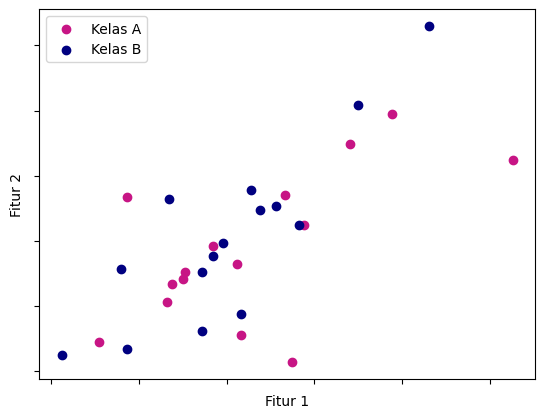

In [ ]:
import matplotlib.pyplot as plt

# Definisikan warna untuk setiap kelas
colors = {
    'class_a': 'MediumVioletRed',
    'class_b': 'Navy'
}

# Kelompokkan label berdasarkan nama kelas
gb = df_label.groupby(['Label'])
class_a = gb.get_group('Kelas A')
class_b = gb.get_group('Kelas B')

# Plot
plt.scatter(x=class_a['Fitur 1'], y=class_a['Fitur 2'], c=colors['class_a'])
plt.scatter(x=class_b['Fitur 1'], y=class_b['Fitur 2'], c=colors['class_b'])
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend(['Kelas A', 'Kelas B'])
plt.gca().axes.xaxis.set_ticklabels([])
plt.gca().axes.yaxis.set_ticklabels([])
plt.show()

Penjelasan:

Kode ini digunakan untuk memvisualisasikan data fitur dari dua kelas dalam bentuk scatter plot. Pertama, warna didefinisikan untuk masing-masing kelas.'Kelas A' menggunakan warna 'MediumVioletRed' dan 'Kelas B' menggunakan 'Navy'. Selanjutnya, data dikelompokkan berdasarkan label kelas menggunakan groupby, dan masing-masing kelas diambil ke dalam variabel class_a dan class_b. Kode kemudian membuat scatter plot dengan menampilkan titik-titik dari kedua kelas berdasarkan nilai fitur yang ada, menggunakan warna yang telah ditentukan. Sumbu x dan y diberi label sebagai 'Fitur 1' dan 'Fitur 2', dan legenda ditambahkan untuk membedakan kedua kelas. Label pada sumbu x dan y dihilangkan untuk memperjelas tampilan, sebelum plot ditampilkan dengan plt.show(). Visualisasi ini membantu dalam memahami distribusi data berdasarkan kelas.

**Klasifikasi Multinomial Naive Bayes**

Penjelasan:

In [ ]:
from sklearn.naive_bayes import MultinomialNB # class untuk model MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score # evaluasi model berdasarkan akurasi

# Inisiasi obyek MultinomialNB
mnb = MultinomialNB()

# Kita dapat langsung menggunakan fitur X dan label y
# hasil dari proses pembuatan data dummy

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

# Fit model
# Label y harus dalam bentuk 1D atau (n_samples,)
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred = mnb.predict(X_train)

# Evaluasi akurasi training
acc_train = accuracy_score(y_train, y_train_pred)

# Prediksi test data
y_test_pred = mnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test = accuracy_score(y_test, y_test_pred)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train}')
print(f'Hasil akurasi data test: {acc_test}')

Hasil akurasi data train: 0.6190476190476191
Hasil akurasi data test: 0.4444444444444444


Penjelasan:

Kode ini menerapkan model klasifikasi Multinomial Naive Bayes untuk data dummy yang telah dibuat sebelumnya. Pertama, objek MultinomialNB diinisialisasi. Data kemudian dibagi menjadi set pelatihan dan pengujian dengan proporsi 70% untuk pelatihan dan 30% untuk pengujian menggunakan train_test_split. Setelah itu, model dilatih dengan data pelatihan menggunakan metode fit, di mana label y harus dalam bentuk 1D. Setelah pelatihan, model digunakan untuk memprediksi label pada data pelatihan dan pengujian, dengan hasil prediksi dievaluasi menggunakan metrik akurasi dengan accuracy_score. Hasil akurasi untuk data pelatihan dan pengujian dicetak, memberikan informasi tentang seberapa baik model berfungsi pada kedua set data.

**Klasifikasi Gaussian Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB # class untuk model GaussianNB

# Inisiasi obyek Gaussian
gnb = GaussianNB()

# Kita menggunakan split data training dan testing
# yang sama dengan model multinomial

# Fit model
# Label y harus dalam bentu 1D atau (n_samples,)
gnb.fit(X_train, y_train)

# Prediksi dengan data training
y_train_pred_gnb = gnb.predict(X_train)

# Evaluasi akurasi training
acc_train_gnb = accuracy_score(y_train, y_train_pred_gnb)

# Prediksi test data
y_test_pred_gnb = gnb.predict(X_test)

# Evaluasi model dengan metric akurasi
acc_test_gnb = accuracy_score(y_test, y_test_pred_gnb)

# Print hasil evaluasi
print(f'Hasil akurasi data train (Gaussian): {acc_train_gnb}')
print(f'Hasil akurasi data test (Gaussian): {acc_test_gnb}')

Hasil akurasi data train (Gaussian): 0.47619047619047616
Hasil akurasi data test (Gaussian): 0.1111111111111111


Penjelasan:

Kode ini menerapkan model klasifikasi Gaussian Naive Bayes untuk dataset yang sama dengan yang digunakan sebelumnya. Pertama, objek GaussianNB diinisialisasi. Selanjutnya, model dilatih menggunakan data pelatihan yang telah dibagi sebelumnya. Setelah pelatihan, model digunakan untuk memprediksi label pada data pelatihan dan pengujian, di mana hasil prediksi untuk data pelatihan dievaluasi menggunakan metrik akurasi dengan accuracy_score. Hasil akurasi untuk kedua set data, yaitu pelatihan dan pengujian, dicetak untuk memberikan gambaran tentang performa model Gaussian Naive Bayes. Dengan membandingkan hasil akurasi model ini dengan model sebelumnya, pengguna dapat mengevaluasi efektivitas masing-masing metode klasifikasi terhadap dataset yang sama.

# Praktikum 4 (Opsional)
Klasifikasi Naive Bayes Pada Data Multinomial

Pada percobaan ini, kita akan menggunakan nilai multinomial untuk melakukan klasifikasi dengan Naive Bayes. Nilai multinomial adalah data yang nilainya didapatkan dari proses menghitung. Sehingga, pada konteks fitur, nilai multinomial fitur berdasarkan proses perhitungan (counting) probabilitas kemunculan fitur tersebut dalam sebuah data. Contoh klasik fitur multinomial adalah perhitungan jumlah kata pada klasifikasi teks.Pada percobaan ini, kasus klasifikasi teks diberikan untuk mempermudah pemahaman terhadap algoritma Naive Bayes tipe Multinomial.

Kita akan menggunakan data spam.csv yang berisi data teks sms dengan label spam dan ham. Spam adalah sms sampah, sedangkan ham adalah sebaliknya

**load data**

In [ ]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Pra Pengolahan Data**

Beberapa hal yang akan dilakukan pada tahap ini yaitu,

1. rop kolom yang tidak digunakan

2. bah nama kolom v1 (label) dan v2 (teks sms)

3. Inspeksi Data

4. Encode label

5. Memisahkan fitur dengan label



**Drop Kolom**

In [ ]:
# Drop 3 kolom terakhir dengan fungsi iloc
df = df.drop(df.iloc[:,2:], axis=1)

# Cek data
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# Data untuk rename kolom v1 dan v2
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

# Rename nama kolom v1 dan v2
df = df.rename(columns=new_cols)

# cek data
df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


**Ubah Nama Kolom V1 dan V2**

**Inspek data**

In [ ]:
# Cek Jumlah Data Per Kelas
print(df['Labels'].value_counts())
print('\n')

# Cek Kelengkapan Data
print(df.info())
print('\n')

# Cek Statistik Deskriptif
print(df.describe())

Labels
ham     4825
spam     747
Name: count, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


Endcod Data

In [ ]:
# Data untuk label
new_labels = {
    'spam': 1,
    'ham': 0
}

# Encode label
df['Labels'] = df['Labels'].map(new_labels)

# Cek data
df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Memisahkan Fitur dengan Label

In [ ]:
X = df['SMS'].values
y = df['Labels'].values

**Ekstraksi fitur**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

# Inisiasi CountVectorizer
bow = CountVectorizer()

# Fitting dan transform X_train dengan CountVectorizer
X_train = bow.fit_transform(X_train)

# Transform X_test
# Mengapa hanya transform? Alasan yang sama dengan kasus pada percobaan ke-3
# Kita tidak menginginkan model mengetahui paramter yang digunakan oleh CountVectorizer untuk fitting data X_train
# Sehingga, data testing dapat tetap menjadi data yang asing bagi model nantinya
X_test = bow.transform(X_test)

In [ ]:
print(len(bow.get_feature_names_out()))
print(f'Dimensi data: {X_train.shape}')

7727
Dimensi data: (4457, 7727)


# Praktikum 5

**Klasifikasi Citra Siang dan Malam**

Pada percobaan ini kita akan mencoba melakukan klasifikasi pada dua label citra, yaitu siang dan malam. Percobaan ini akan memberikan pengalaman bagi Anda untuk melakukan proses pra pengolahan data, ekstraksi fitur, dan melakukan klasifikasi dengan menggunakan classifier sederhana dan SVM.

**Langkah 0 - Import Libraryl**

In [ ]:
# Import Required Libraries
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import random
import numpy as np
import pandas as pd

In [ ]:
# Image directories
train_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/images/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/images/images/test"

Penjelasan:

Kode diatas digunakn untuk mengimpor library dan meload dataset gambar yang akan digunakan u ntuk menguji

**Langkah 1 - Load Data dan Visualisasikan**

In [ ]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')

    img_list = []

    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)

            if not img is None:
                img_list.append((img, label))

    return img_list

Penjelasan:

Kode ini mendefinisikan fungsi load_dataset yang digunakan untuk memuat gambar dari direktori tertentu. Fungsi ini menerima satu argumen, img_dir, yang merupakan path ke direktori gambar. Pertama, direktori diubah menjadi objek Path, dan semua subdirektori di dalamnya diambil menggunakan glob('*'). Kemudian, untuk setiap subdirektori, label ditentukan dari nama direktori. Fungsi ini mencari semua file gambar dengan ekstensi .jpg di dalam subdirektori, dan setiap gambar yang berhasil dimuat (tidak None) disimpan dalam daftar img_list sebagai tuple yang berisi gambar dan labelnya. Akhirnya, daftar gambar dan label dikembalikan oleh fungsi. Kode ini berguna untuk mempersiapkan data gambar untuk analisis atau pemodelan lebih lanjut.

Load gambar training

In [ ]:
# Load training data
train_img = load_dataset(train_dir)

Penjelasan:

Kode ini memanggil fungsi load_dataset untuk memuat data gambar pelatihan dari direktori yang ditentukan oleh variabel train_dir. Hasil dari pemanggilan fungsi ini, yaitu daftar gambar beserta labelnya, disimpan dalam variabel train_img. Dengan cara ini, gambar-gambar pelatihan siap digunakan untuk analisis atau pelatihan model, dan setiap gambar akan disertai dengan label yang sesuai.

Lakukan pengecekan pada salah satu data pada list. List harus berisi tuple dengan dua data, yaitu data gambar dan label dari gambar.

In [ ]:
# Check the first data
# It should be a tuple consist of arrays of image and image labels
train_img[0]

(array([[[ 1,  6, 10],
         [ 8, 13, 17],
         [ 9, 13, 16],
         ...,
         [ 2,  1,  0],
         [10,  9,  7],
         [ 5,  4,  2]],
 
        [[ 0,  4,  8],
         [ 3,  8, 12],
         [ 3,  6, 11],
         ...,
         [ 9,  8,  6],
         [14, 13, 11],
         [ 4,  3,  1]],
 
        [[15, 18, 25],
         [15, 18, 23],
         [16, 17, 22],
         ...,
         [ 9,  8,  6],
         [15, 14, 12],
         [ 4,  3,  1]],
 
        ...,
 
        [[19,  8, 16],
         [ 7,  0,  4],
         [12,  1,  7],
         ...,
         [ 3,  2,  0],
         [ 5,  4,  0],
         [ 4,  3,  0]],
 
        [[27, 16, 24],
         [10,  0,  8],
         [19,  8, 14],
         ...,
         [14, 13,  9],
         [34, 33, 29],
         [36, 35, 31]],
 
        [[22, 12, 20],
         [17, 10, 17],
         [30, 21, 26],
         ...,
         [ 1,  0,  0],
         [31, 30, 26],
         [ 2,  1,  0]]], dtype=uint8),
 'night')

Penjelasan:

Kode ini memeriksa elemen pertama dari daftar train_img, yang berisi hasil dari pemanggilan fungsi load_dataset. Dengan menampilkan train_img[0], kode ini akan menunjukkan tuple pertama dalam daftar, yang seharusnya terdiri dari dua elemen: array gambar (representasi pixel gambar) dan label yang terkait dengan gambar tersebut. Hal ini berguna untuk memastikan bahwa data telah dimuat dengan benar dan dalam format yang diharapkan, sehingga siap untuk digunakan dalam analisis atau pelatihan model.

Cek ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_img))

# Check img size
print(f'Image {pick_random}')
print(train_img[pick_random][0].shape)

Image 157
(700, 1280, 3)


Penjelasan:

Kode ini melakukan pemeriksaan ukuran gambar secara acak dari daftar train_img. Pertama, np.random.randint(0, len(train_img)) menghasilkan angka acak yang digunakan sebagai indeks untuk memilih gambar dari daftar. Selanjutnya, kode mencetak indeks gambar yang dipilih dan ukuran gambar tersebut dengan print(train_img[pick_random][0].shape). Di sini, train_img[pick_random][0] mengacu pada array gambar yang diambil dari tuple, dan .shape memberikan dimensi gambar tersebut. Ini berguna untuk memastikan bahwa semua gambar dalam dataset memiliki ukuran yang konsisten atau untuk memeriksa variasi ukuran gambar.

Tampilkan gambar untuk inspeksi secara visual. Buatlah fungsi untuk membantu memvisualkan gambar

In [ ]:
# Function to Visualize
def random_img_viz(img_list):
    rand_num = np.random.randint(0, len(img_list))

    img = img_list[rand_num][0]
    label = img_list[rand_num][1]
    label_str = 'day' if label == 1 else 'night'

    plt.imshow(img)
    print(f'Shape\t: {img.shape}')
    print(f'Label\t: {label}')

Penjelasan:

Kode ini mendefinisikan fungsi random_img_viz yang bertujuan untuk menampilkan gambar secara acak dari daftar gambar (img_list) dan mencetak informasi terkait gambar tersebut. Fungsi dimulai dengan menghasilkan angka acak yang digunakan untuk memilih gambar dari daftar. Gambar yang dipilih disimpan dalam variabel img, dan labelnya disimpan dalam label. Label tersebut kemudian diubah menjadi string 'day' jika nilainya 1, atau 'night' jika nilainya 0. Fungsi ini menggunakan plt.imshow(img) untuk menampilkan gambar, dan mencetak bentuk gambar (img.shape) serta labelnya. Fungsi ini berguna untuk visualisasi data, memungkinkan pengguna untuk melihat contoh gambar beserta labelnya secara acak dari dataset.

Lakukan visualisasi gambar secara acak

Shape	: (889, 1280, 3)
Label	: day


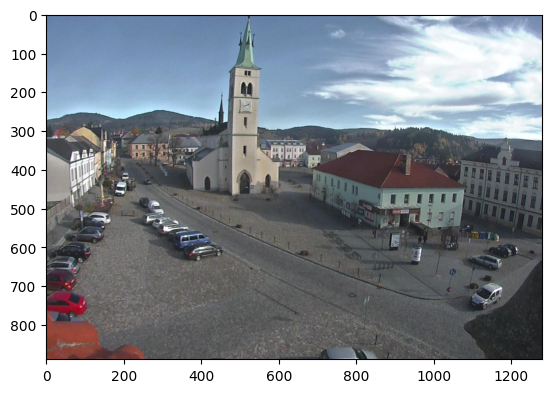

In [ ]:
random_img_viz(train_img)

Penjelasan:

Kode ini mendefinisikan fungsi random_img_viz yang bertujuan untuk menampilkan gambar secara acak dari daftar gambar (img_list) dan mencetak informasi terkait gambar tersebut. Fungsi dimulai dengan menghasilkan angka acak yang digunakan untuk memilih gambar dari daftar. Gambar yang dipilih disimpan dalam variabel img, dan labelnya disimpan dalam label. Label tersebut kemudian diubah menjadi string 'day' jika nilainya 1, atau 'night' jika nilainya 0. Fungsi ini menggunakan plt.imshow(img) untuk menampilkan gambar

**Langkah 3 - Pra Pengolahan Data**

Bualah fungsi berikut untuk menstandarkan ukuran gambar

In [ ]:
def standarized_input(image):
    # resize to w: 1100, h:600
    std_img = cv2.resize(image, (1100,600))

    return std_img

Penjelasan:

Kode ini mendefinisikan fungsi standarized_input, yang bertujuan untuk mengubah ukuran gambar menjadi dimensi yang konsisten. Fungsi ini menerima satu argumen, image, yang merupakan gambar yang ingin diubah ukurannya. Di dalam fungsi, gambar diubah ukurannya menjadi lebar 1100 piksel dan tinggi 600 piksel menggunakan cv2.resize. Hasil gambar yang telah diubah ukurannya disimpan dalam variabel std_img dan kemudian dikembalikan oleh fungsi. Fungsi ini berguna untuk memastikan bahwa semua gambar memiliki ukuran yang sama

Selanjutnya, buatlah fungsi untuk kebutuhan encoding label

In [ ]:
def label_encoder(label):
    # Encode the label
    # day as 1; night as 0
    num_val = 0

    if(label == 'day'):
        num_val = 1

    return num_val

Penjelasan:

Kode ini mendefinisikan fungsi label_encoder, yang bertujuan untuk mengubah label teks menjadi nilai numerik. Fungsi ini menerima satu argumen, label, yang diharapkan berupa string ('day' atau 'night'). Di dalam fungsi, jika label yang diberikan adalah 'day', maka num_val diatur menjadi 1; jika tidak, num_val tetap 0. Hasil akhir, yaitu nilai numerik num_val, kemudian dikembalikan oleh fungsi. Fungsi ini berguna untuk mempersiapkan label dalam format yang dapat diproses oleh model pembelajaran mesin

Terakhir, buatlah fungsi untuk melakukan kedua hal tersebut secara sekaligus untuk semua gambar dalam list.

In [ ]:
def preprocess(img_list):
    std_img_list = []

    for item in img_list:
        image = item[0]
        label = item[1]

        # Standarized the image
        std_img = standarized_input(image)

        # Create the label
        img_label = label_encoder(label)

        std_img_list.append((std_img, img_label))

    return std_img_list

Penjelasan:

Kode ini mendefinisikan fungsi preprocess, yang bertujuan untuk memproses daftar gambar (img_list) dan mengubah setiap gambar serta labelnya menjadi format yang distandarisasi. Fungsi ini membuat daftar baru, std_img_list, untuk menyimpan hasil pemrosesan. Dalam loop, setiap item dalam img_list dipisahkan menjadi image dan label. Gambar kemudian diubah ukurannya menggunakan fungsi standarized_input, dan label diubah menjadi nilai numerik dengan label_encoder. Hasilnya, pasangan gambar yang telah distandarisasi dan label yang terencode ditambahkan ke dalam std_img_list

Lakukan pra pengolahan data pada data training.

In [ ]:
train_std_img_list = preprocess(train_img)

Penjelasan:

Kode ini memanggil fungsi preprocess untuk memproses daftar gambar pelatihan (train_img). Hasil dari pemanggilan fungsi, yang merupakan daftar baru berisi gambar yang telah diubah ukurannya dan label yang telah terencode, disimpan dalam variabel train_std_img_list

Lakukan pengecekan ukuran gambar secara acak

In [ ]:
# Random size checking
pick_random = np.random.randint(0, len(train_std_img_list))

# Check img size
print(f'Image {pick_random}')
print(train_std_img_list[pick_random][0].shape)

Image 145
(600, 1100, 3)


Penjelasan:

Kode ini melakukan pemeriksaan ukuran gambar secara acak dari daftar train_std_img_list. Pertama, angka acak dihasilkan untuk memilih indeks gambar dari daftar tersebut. Kemudian, kode mencetak indeks gambar yang dipilih dan ukuran gambar tersebut dengan print(train_std_img_list[pick_random][0].shape). Di sini, train_std_img_list[pick_random][0] mengacu pada gambar yang telah distandarisasi, dan .shape memberikan dimensi gambar. Tujuan dari kode ini adalah untuk memastikan bahwa gambar dalam daftar memiliki ukuran yang sesuai setelah proses standarization

WARNING! Perhatikan ukuran (shape) dari data image. Atribut shape akan menampilkan dalam konteks baris (height) x kolom (width)

Lakukan inspeksi visual dengan fungsi random_img_viz yang telah dibuat sebelumnya pada gambar hasil pra pengolahan.

Shape	: (600, 1100, 3)
Label	: 1


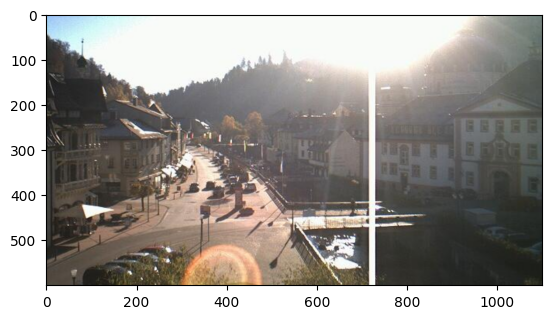

In [ ]:
random_img_viz(train_std_img_list)

Penjelasan:

Kode ini memanggil fungsi random_img_viz dengan argumen train_std_img_list, yang berisi daftar gambar yang telah distandarisasi dan labelnya. Fungsi ini akan memilih secara acak satu gambar dari daftar, menampilkannya, dan mencetak informasi terkait gambar tersebut, termasuk ukuran gambar dan labelnya

**Langkah 4 - Ekstraksi Fitur**

Selanjutnya, untuk dapat membadakan antara label satu dengan label yang lain, kita memerlukan sebuah fitur. Fitur adalah penciri dari sebuah data yang dapat digunakan untuk membendakan data satu dengan yang lain. Pada percobaan kali ini, kita akan menggunakan fitur yang sederhana yaitu nilai rata-rata dari tingkat kecerahan gambar (average brightness). Namun sebelum dapat melakukan hal tersebut, kita akan mengubah ruang warna (colorspace) dari RGB menjadi HSV (Hue, Saturation, Value). Hal ini dikarenakan, tingkat kecerahan (brightness) lebih mudah didapatkan dari HSV berdasarkan nilai Valuenya.

Buatlah fungsi berikut untuk mendapatkan nilai rata-rata tingkat kecerahan

In [ ]:
# Get feature based on average brightness using HSV colorspace
def avg_brightness(image):
    # Convert image to HSV
    img_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)

    # Calculate the avg of brightness
    sum_brightness = np.sum(img_hsv[:,:,2]) # take the 3rb value which is the V channel
    area = image.shape[0] * image.shape[1]
    avg = sum_brightness / area

    return avg

Penjelasan:

Kode ini mendefinisikan fungsi avg_brightness, yang bertujuan untuk menghitung kecerahan rata-rata dari sebuah gambar. Fungsi ini menerima satu argumen, image, yang merupakan gambar dalam format RGB.

Di dalam fungsi, gambar pertama-tama diubah ke ruang warna HSV (Hue, Saturation, Value) menggunakan cv2.cvtColor. Kemudian, kecerahan (yang diwakili oleh channel V dalam HSV) dijumlahkan dengan np.sum(img_hsv[:,:,2]). Luas area gambar dihitung dengan mengalikan jumlah baris dan kolom gambar (image.shape[0] * image.shape[1]). Rata-rata kecerahan dihitung dengan membagi total kecerahan dengan luas area. Hasil rata-rata kecerahan kemudian dikembalikan oleh fungsi

Lakukan pengecekan pada gambar secara acak. INGAT! Gunakan gambar yang telah melalui proses pra pengolahan data!

Image 62
Avg Brighness: 72.5540


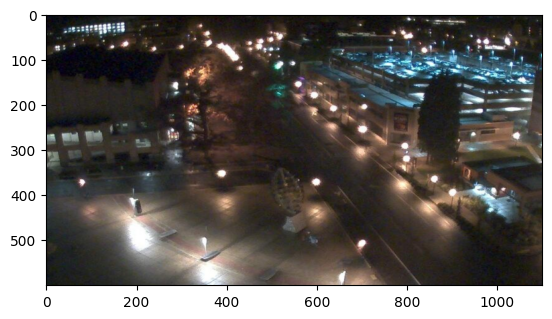

In [ ]:
# Check on random image
rand_img = np.random.randint(0, len(train_std_img_list))

feature_img = train_std_img_list[rand_img][0]

avg_img = avg_brightness(feature_img)

print(f'Image {rand_img}')
print(f'Avg Brighness: {avg_img:.4f}')
plt.imshow(feature_img)

Penjelasan:

Kode ini untuk memilih dan menganalisis kecerahan rata-rata dari gambar acak dalam daftar train_std_img_list. Pertama, angka acak dihasilkan untuk memilih indeks gambar (rand_img) dari daftar. Gambar yang dipilih disimpan dalam variabel feature_img. Kemudian, fungsi avg_brightness dipanggil dengan gambar tersebut untuk menghitung kecerahan rata-ratanya, yang disimpan dalam variabel avg_img. Selanjutnya, kode mencetak indeks gambar yang dipilih dan nilai rata-rata kecerahan dengan format empat desimal. Terakhir, gambar tersebut ditampilkan menggunakan plt.imshow

**Langkah 5 - Klasifikasi dengan Metode Threshold**

Pada tahap ini, kita akan melakukan proses klasifikasi sederhana dengan menggunakan nilai ambang batas (threshold) dari nilai rata-rata kecerahan yang kita tentukan sendiri.

Buatlah fungsi berikut,

In [ ]:
def predict_label(img, threshold):
    # Computer average brightness
    avg = avg_brightness(img)
    pred = 0

    # Predict the label based on user defined threshold
    if avg > threshold:
        pred = 1

    return pred

Penjelasan:

Kode ini mendefinisikan fungsi predict_label, yang bertujuan untuk memprediksi label (day atau night) berdasarkan kecerahan rata-rata gambar dan ambang batas yang ditentukan. Fungsi ini menerima dua argumen: img, yang merupakan gambar yang ingin dianalisis, dan threshold, yang merupakan nilai ambang batas untuk menentukan label. Di dalam fungsi, kecerahan rata-rata gambar dihitung menggunakan fungsi avg_brightness. Variabel pred diinisialisasi dengan nilai 0. Fungsi kemudian memeriksa apakah kecerahan rata-rata (avg) lebih besar dari ambang batas yang diberikan. Jika ya, pred diubah menjadi 1, yang menunjukkan bahwa labelnya adalah 'day'. Jika tidak, label tetap 0, yang menunjukkan 'night'

Lakukan pengecekan prediksi secara acak pada data training

Image 3
Actual label: 0
Predicted label: 0


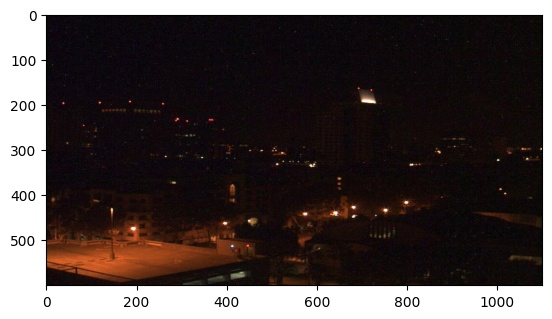

In [ ]:
# Test the classifier on train data
rand_img = np.random.randint(0, len(train_std_img_list))

pred = predict_label(train_std_img_list[rand_img][0], threshold=120)

# Evaluate
print(f'Image {rand_img}')
print(f'Actual label: {train_std_img_list[rand_img][1]}')
print(f'Predicted label: {pred}')
plt.imshow(train_std_img_list[rand_img][0])

Penjelasan:

Kode ini menguji fungsi klasifikasi predict_label pada gambar acak dari dataset pelatihan train_std_img_list. Pertama, angka acak dihasilkan untuk memilih indeks gambar (rand_img) dari daftar. Kemudian, fungsi predict_label dipanggil dengan gambar yang dipilih dan ambang batas kecerahan (threshold) yang ditentukan, yaitu 120. Hasil prediksi disimpan dalam variabel pred. Selanjutnya, kode mencetak informasi tentang gambar yang dipilih, termasuk indeks gambar (Image {rand_img}), label aktual (Actual label), dan label yang diprediksi (Predicted label). Terakhir, gambar tersebut ditampilkan menggunakan plt.imshow

**Langkah 6 - Evaluasi (Manual)**

Selanjutnya kita akan membuat fungsi evaluasi model sederhana, yaitu dengan membandingkan label yang diprediksi benar dengan seluruh data. Ingat kembali konsep confussion matrix.

Buatlah fungsi berikut,

In [ ]:
def evaluate(img_list, threshold):
    miss_labels = []

    for file in img_list:
        # Get the ground truth / correct label
        img = file[0]
        label = file[1]

        # Get prediction
        pred_label = predict_label(img, threshold)

        # Compare ground truth and pred
        if pred_label != label:
            miss_labels.append((img, pred_label, label))

    total_img = len(img_list)
    corr_pred = total_img - len(miss_labels)
    accuracy = corr_pred / total_img

    print(f'Accuracy: {accuracy:.4f}')

Penjelasan:

Kode ini mendefinisikan fungsi evaluate, yang bertujuan untuk mengevaluasi akurasi klasifikasi berdasarkan gambar dalam daftar img_list dan ambang batas kecerahan yang diberikan. Fungsi ini memulai dengan inisialisasi daftar miss_labels untuk menyimpan gambar yang diprediksi salah.Dalam loop, setiap gambar dan label yang benar diambil dari daftar. Fungsi predict_label dipanggil untuk mendapatkan label prediksi berdasarkan gambar dan ambang batas. Jika label prediksi tidak cocok dengan label yang benar, gambar tersebut ditambahkan ke dalam daftar miss_labels. Setelah semua gambar dievaluasi, fungsi menghitung akurasi dengan membandingkan jumlah prediksi yang benar dengan total gambar, lalu mencetak nilai akurasi hingga empat desimal. Fungsi ini berguna untuk menilai performa model klasifikasi secara keseluruhan

Lakukan evaluasi pada data training dengan nilai ambang batas 120

In [ ]:
# Evaluate on train data
evaluate(train_std_img_list, threshold=120)

Accuracy: 0.8417


Penjelasan:

Kode ini memanggil fungsi evaluate untuk menilai akurasi klasifikasi pada data pelatihan (train_std_img_list) menggunakan ambang batas kecerahan yang ditetapkan pada 120. Fungsi ini akan memproses setiap gambar dalam daftar, membandingkan label prediksi dengan label yang sebenarnya, dan menghitung akurasi model berdasarkan jumlah prediksi yang benar. Setelah evaluasi selesai, fungsi akan mencetak nilai akurasi, memberikan gambaran tentang seberapa baik model mampu mengklasifikasikan gambar dalam dataset pelatihan

Selanjutnya, kita akan melakukan evaluasi pada data testing. Namun sebelumnya, data testing harus diperlakukan sama dengan data training dalam konteks pra progolahan data dan ekstraksi fitur.

In [ ]:
# Evaluate on test data

# Load test data
test_img = load_dataset(test_dir)

# Preprocess
test_std_img_list = preprocess(test_img)

# Predict
evaluate(test_std_img_list, threshold=120)

Accuracy: 0.8688


Penjelasan:

Kode ini melakukan evaluasi klasifikasi pada data uji dengan tiga langkah utama. Pertama, data uji dimuat dari direktori test_dir menggunakan fungsi load_dataset, dan hasilnya disimpan dalam test_img. Kedua, data tersebut diproses dengan fungsi preprocess, yang mengubah ukuran gambar dan mengencode label, sehingga menghasilkan daftar test_std_img_list. Terakhir, fungsi evaluate dipanggil untuk membandingkan label yang diprediksi dengan label yang sebenarnya pada gambar dalam data uji, menghitung akurasi, dan mencetak hasil evaluasi. Dengan cara ini, kode mengevaluasi seberapa baik model klasifikasi dapat bekerja pada data yang belum pernah dilihat sebelumnya

## Another Way - Membuat Feature Vectors dan Klasifikasi dengan SVM

Pada proses klasifikasi sebelumnya, kita hanya membedakan kelas day dan night dengan nilai ambang batas. Cara tersebut memang mudah untuk digunakan, akan tetapi belum tentu secara baik dan general dapat memedakan kedua data. Oleh karena itu, pada bagian ini, kita akan mencoba menggunakan pendekatan lain untuk melakukan proses klasifikasi. Kita akan kembali mulai pada langkah 4

**Langkah 4 alternatif - Membuat Feature Vectors**

Perbedaan mendasar dari langkah 4 sebelumnya adalah, kita akan melakukan tabulasi semua nilai rata-rata kecerahan pada data, dan menyimpannya dalam bentuk tabel. Dalam konteks ini, kita akan membuat tabel dengan kolom fitur dan label.

Buatlah fungsi berikut,

In [ ]:
# Create function to extract feature for every images and stored in tabular data
# Stored in Pandas dataframe
def extract_avg_bright_feature(img_list):
    avg_list = []
    labels = []

    for img in img_list:
        img_avg = avg_brightness(img[0]) # Get the avg brightness from image
        img_label = img[1] # Get the image label

        avg_list.append(img_avg)
        labels.append(img_label)

    # Stack data in columcular way
    data = np.column_stack((avg_list, labels))
    # Create a Pandas dataframe
    df = pd.DataFrame(data, columns=['AVG_BRIGHT', 'LABELS'])

    return df

Penjelasan:

Kode ini mendefinisikan fungsi extract_avg_bright_feature, yang bertujuan untuk mengekstrak fitur kecerahan rata-rata dari daftar gambar dan menyimpannya dalam sebuah DataFrame Pandas. Fungsi ini mulai dengan inisialisasi dua daftar, avg_list untuk menyimpan nilai kecerahan rata-rata dan labels untuk menyimpan label gambar. Dalam loop, fungsi menghitung kecerahan rata-rata setiap gambar menggunakan avg_brightness dan menyimpan hasilnya bersama dengan label gambar. Setelah semua gambar diproses, data dari kedua daftar digabungkan secara kolumnar menggunakan np.column_stack, dan sebuah DataFrame Pandas dibuat dengan kolom 'AVG_BRIGHT' dan 'LABELS'. Fungsi ini berguna untuk menyusun data dalam format yang lebih mudah dianalisis

Cek hasilnya pada data training,

In [ ]:
# Extract feature on train data
train_avg_img = extract_avg_bright_feature(train_std_img_list)
print(f'Shape: {train_avg_img.shape}')
train_avg_img.head()

Shape: (240, 2)


,AVG_BRIGHT,LABELS
0,25.731924,0.0
1,33.761653,0.0
2,30.474629,0.0
3,25.626109,0.0
4,33.015533,0.0


Penjelasan:

Kode ini memanggil fungsi extract_avg_bright_feature untuk mengekstrak fitur kecerahan rata-rata dari daftar gambar yang telah distandarisasi (train_std_img_list). Hasilnya disimpan dalam variabel train_avg_img, yang merupakan sebuah DataFrame Pandas. Setelah itu, kode mencetak bentuk DataFrame dengan train_avg_img.shape, yang memberikan informasi tentang jumlah baris dan kolom dalam DataFrame tersebut. Selanjutnya, fungsi head() dipanggil untuk menampilkan lima baris pertama dari DataFrame, memberikan gambaran awal tentang data yang berisi nilai kecerahan rata-rata dan label gambar. Kode ini berguna untuk memastikan bahwa fitur telah berhasil diekstraksi dan disusun dengan benar

Lakukan langkah yang serupa pada data testing

In [ ]:
# Do the same thing on test data
test_avg_img = extract_avg_bright_feature(test_std_img_list)
print(f'Shape: {test_avg_img.shape}')
test_avg_img.head()

Shape: (160, 2)


,AVG_BRIGHT,LABELS
0,14.008245,0.0
1,46.693686,0.0
2,56.674038,0.0
3,47.079873,0.0
4,26.358703,0.0


Penjelasan:

Kode ini menjalankan fungsi extract_avg_bright_feature untuk mengekstrak fitur kecerahan rata-rata dari daftar gambar yang telah distandarisasi pada data uji (test_std_img_list). Hasilnya disimpan dalam variabel test_avg_img, yang merupakan DataFrame Pandas. Setelah itu, kode mencetak bentuk DataFrame menggunakan test_avg_img.shape untuk menunjukkan jumlah baris dan kolom. Fungsi head() kemudian dipanggil untuk menampilkan lima baris pertama dari DataFrame, memberikan gambaran awal tentang data yang berisi nilai kecerahan rata-rata dan label gambar. Ini berguna untuk memverifikasi bahwa fitur dari data uji telah berhasil diekstraksi dan disusun dengan baik

**Langkah 5 alternatif**

Selanjutnya, kita akan membuat model SVM dengan kernel RBF (default) dengan memanfaatkan libary scikit-learn.

In [ ]:
# impor library
from sklearn.svm import SVC

#split data dan label
X_train = train_avg_img.iloc[:,0].values.reshape(-1,1)
y_train = train_avg_img.iloc[:,1]
X_test = test_avg_img.iloc[:,0].values.reshape(-1,1)
y_test = test_avg_img.iloc[:,1]

model = SVC()
model.fit(X_train, y_train)

SVC()

Penjelasan:

Kode ini melakukan pelatihan model klasifikasi menggunakan Support Vector Classifier (SVC) dari scikit-learn. Pertama, data fitur dan label dipisahkan dari DataFrame train_avg_img dan test_avg_img. Fitur kecerahan rata-rata dari data pelatihan (X_train) diambil dan diubah bentuknya menjadi dua dimensi dengan reshape(-1,1), sementara label (y_train) diambil langsung. Proses yang sama dilakukan untuk data uji, menghasilkan X_test dan y_test. Setelah mempersiapkan data, model SVC diinisialisasi dan dilatih menggunakan metode fit dengan data pelatihan X_train dan y_train. Kode ini menyiapkan model untuk digunakan dalam melakukan prediksi pada data uji

**Langkah 6 alternatif**

Selanjutnya, kita akan melakukan evaluasi pada data training dan testing dengan bantuan library scikit-learn.

In [ ]:
from sklearn.metrics import accuracy_score

# prediksi data latih
y_train_pred = model.predict(X_train)

# mendapatkan akurasi data latih
acc_train = accuracy_score(y_train, y_train_pred)

# membuat prediksi data uji
y_test_pred = model.predict(X_test)

# akurasi data uji
acc_test = accuracy_score(y_test, y_test_pred)

# hasil
print(f'akurasi pada dat alatih: {acc_train}')
print(f'akurasi data pengujian: {acc_test}')

Accuracy on train: 0.8583333333333333
Accuracy on test: 0.9


Penjelasan:

Kode ini mengevaluasi akurasi model SVC pada data pelatihan dan data uji. Pertama, model melakukan prediksi pada data pelatihan (X_train) dan hasilnya disimpan dalam y_train_pred. Kemudian, akurasi dihitung dengan membandingkan label yang sebenarnya (y_train) dengan prediksi, menggunakan fungsi accuracy_score, dan disimpan dalam acc_train. Proses serupa dilakukan untuk data uji (X_test), menghasilkan prediksi y_test_pred dan akurasi acc_test. Akhirnya, kode mencetak akurasi untuk kedua set data, memberikan gambaran tentang performa model dalam mengklasifikasikan data

# Tugas (Opsional)

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv.

Jawaban :



**Impor library**

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

**Memuat data**

In [52]:
# Load Data
data = pd.read_csv('voice.csv')

# baca data
data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


**Membagi data**

In [53]:
# bagi data menjadi fitur x dan y
X = data.drop('label', axis=1)  #memisahkan fitur
y = data['label']  #kolom target

#membagi Data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Skala fitur data**

In [55]:
#skala Fitur
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**Melatih model**

In [56]:
#melatih model svm
model = SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

**Hasil**

In [57]:
#evaluasi Model
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

akurasi = accuracy_score(y_test, y_pred)
print("Akurasi SVM:", akurasi)

              precision    recall  f1-score   support

      female       0.96      0.99      0.98       297
        male       0.99      0.97      0.98       337

    accuracy                           0.98       634
   macro avg       0.98      0.98      0.98       634
weighted avg       0.98      0.98      0.98       634

Akurasi SVM: 0.9763406940063092


2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

* Menggunakan data spam.csv

* Fitur CountVectorizer dengan mengaktifkan stop_words

* Evaluasi hasilnya

Jawaban :



**Impor library dan memuat data**

In [58]:
#import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


#load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/spam.csv', encoding='latin-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Menyiapkan fitur dan label pada data**

In [59]:
#menyiapkan fitur dan label
data = data[['v1', 'v2']]  # Memilih kolom yang relevan
data.columns = ['label', 'text']  # Mengganti nama kolom
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Mengubah label menjadi numerik

<ipython-input-59-fd7cc05122bb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # Mengubah label menjadi numerik


**Membagi data**

In [60]:
#membagi data
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Menggunakan CountVectorizer**

In [61]:
#menggunakan CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)

**Melatih model**

In [62]:
#membuat dan melatih model
model = MultinomialNB()
model.fit(X_train_counts, y_train)

MultinomialNB()

**Hasil**

In [63]:
#melakukan prediksi
y_pred = model.predict(X_test_counts)

#evaluasi hasil
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

#menampilkan hasil
print("Akurasi:", accuracy)
print("\nClassification Report:\n", classification_rep)
print("\nConfusion Matrix:\n", conf_matrix)

Akurasi: 0.9838565022421525

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       965
           1       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115


Confusion Matrix:
 [[959   6]
 [ 12 138]]


3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,

* Menggunakan data spam.csv

* Fitur TF-IDF dengan mengaktifkan stop_words

* Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.

* Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

Jawaban :     

**Impor library dan memuat data**

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/spam.csv', encoding='latin-1')
data.head()
data = data[['v1', 'v2']]  # memilih kolom yang relevan
data.columns = ['label', 'text']
data['label'] = data['label'].map({'ham': 0, 'spam': 1})  # ubah label ke bentuk numerik

**Membagi data**

In [65]:
#membagidata
X = data['text']
y = data['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Implementasi TF-IDF**

In [66]:
#menggunakan TF-IDF
tfidf_method = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf_method.fit_transform(X_train)
X_test_tfidf = tfidf_method.transform(X_test)

**Melatih model**

In [67]:
#membuat dan melatih model
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train_tfidf, y_train)

MultinomialNB()

**Hasil**

In [68]:
#prediksi menggunakan TF-IDF
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

#evaluasi hasil
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
classification_rep_tfidf = classification_report(y_test, y_pred_tfidf)
conf_matrix_tfidf = confusion_matrix(y_test, y_pred_tfidf)

#menampilkan hasil evaluasi
print("Akurasi (TF-IDF):", accuracy_tfidf)
print("\nClassification Report (TF-IDF):\n", classification_rep_tfidf)
print("\nConfusion Matrix (TF-IDF):\n", conf_matrix_tfidf)

Akurasi (TF-IDF): 0.9668161434977578

Classification Report (TF-IDF):
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115


Confusion Matrix (TF-IDF):
 [[965   0]
 [ 37 113]]


**kesimpulan**

Fitur terbaik pada kasus spam.csv adalah TF-IDF karena hasilnya lebih memberikan bobot lebih besar pada kata-kata yang jarang muncul di keseluruhan dataset. Kata-kata unik yang sering muncul dalam pesan spam, seperti "prize", "free", atau "win", akan memiliki bobot lebih tinggi, sehingga model lebih mudah membedakan antara pesan spam dan non-spam. Dengan TF-IDF, model menjadi lebih sensitif terhadap kata-kata penting dan tidak terlalu terpengaruh oleh kata-kata umum yang mungkin sering muncul di kedua jenis pesan.


# Tugas 2

Buatlah model klasifikasi dengan menggunakan SVM berdasarkan data pada Percobaan 5 dengan menggunakan fitur histogram.

Jawaban :     

**Impor Library dan load data**

In [69]:
from pathlib import Path
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

#laod data
train_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/images/images/training"
test_dir = "/content/drive/MyDrive/Colab Notebooks/Machine Learning/P3/images/images/test"


**Laod Dataset**

In [70]:
def load_dataset(img_dir):
    p = Path(img_dir)
    dirs = p.glob('*')
    img_list = []
    for dir in dirs:
        label = str(dir).split('/')[-1]
        for file in dir.glob('*.jpg'):
            img = mpimg.imread(file)
            if img is not None:
                img_list.append((img, label))
    return img_list

**Fungsi Preprocessing**

In [71]:
def standarized_input(image):
    std_img = cv2.resize(image, (1100, 600))
    return std_img

def label_encoder(label):
    return 1 if label == 'day' else 0

def preprocess(img_list):
    std_img_list = []
    for item in img_list:
        image = item[0]
        label = item[1]
        std_img = standarized_input(image)
        img_label = label_encoder(label)
        std_img_list.append((std_img, img_label))
    return std_img_list

**Memuat dan memproses data pelatihan**

In [72]:
train_img = load_dataset(train_dir)
train_std_img_list = preprocess(train_img)

**Menghitung histogram**

In [73]:
# menghitung histogram
def compute_histogram(image):
    histogram = cv2.calcHist([image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    histogram = cv2.normalize(histogram, histogram).flatten()
    return histogram

**Fungsi ekstraksi fitur**

In [74]:
def extract_features(img_list):
    features = []
    labels = []
    for item in img_list:
        image = item[0]
        label = item[1]
        hist = compute_histogram(image)
        features.append(hist)
        labels.append(label)
    return np.array(features), np.array(labels)

**ekstrak fitur**

In [75]:
#ekstrak Fitur untuk Data Pelatihan
X_train, y_train = extract_features(train_std_img_list)

**melatih data**

In [76]:
model = svm.SVC(kernel='linear')
model.fit(X_train, y_train)

SVC(kernel='linear')

**memproses data pengujian**

In [77]:
#memuat dan memproses data pengujian
test_img = load_dataset(test_dir)
test_std_img_list = preprocess(test_img)

#ekstraksi fitur untuk data pengujian
X_test, y_test = extract_features(test_std_img_list)

**Hasil data**

In [78]:
# evaluasi model data pengujian
y_test_pred = model.predict(X_test)

# menampilkan hasil data
print("Hasil laporan klasifikasi:")
print(classification_report(y_test, y_test_pred))
print("hasil matriks kebingungan:")
print(confusion_matrix(y_test, y_test_pred))

Hasil laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        80
           1       1.00      0.89      0.94        80

    accuracy                           0.94       160
   macro avg       0.95      0.94      0.94       160
weighted avg       0.95      0.94      0.94       160

hasil matriks kebingungan:
[[80  0]
 [ 9 71]]


**Histogram**

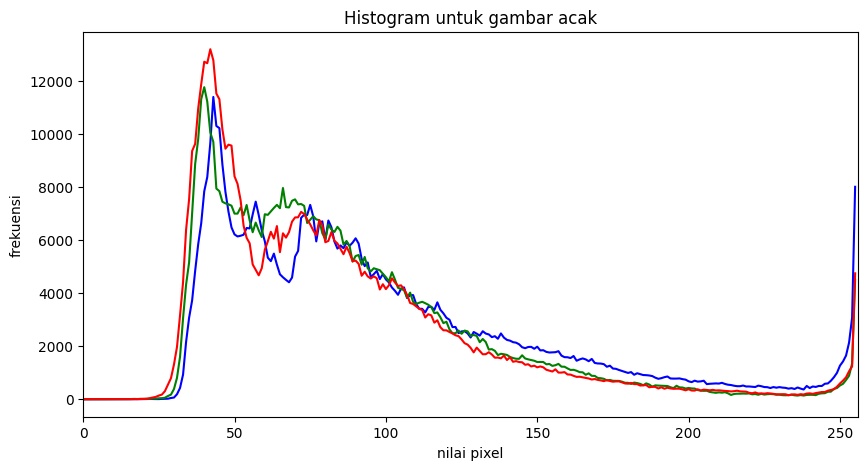

In [81]:
def plot_histogram(image, title='Histogram'):
    #menghitung histogram untuk setiap channel (RGB)
    colors = ('b', 'g', 'r')
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(colors):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        plt.plot(hist, color=color)
        plt.xlim([0, 256])
    plt.title(title)
    plt.xlabel('nilai pixel')
    plt.ylabel('frekuensi')
    plt.show()

# menampilkan histogram untuk gambar acak dari dataset
random_img_index = np.random.randint(0, len(train_std_img_list))
random_img = train_std_img_list[random_img_index][0]
plot_histogram(random_img, title='Histogram untuk gambar acak')